<a href="https://colab.research.google.com/github/sreejithpkumar/Houseprice_predictor/blob/main/Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model  import LinearRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [ ]:
df = pd.read_csv('/content/sample_data/california_housing_train.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [ ]:
l = len(df.columns)
features = df.columns
features.tolist()

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

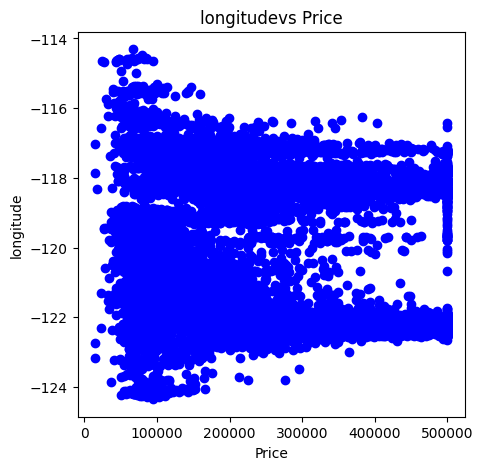

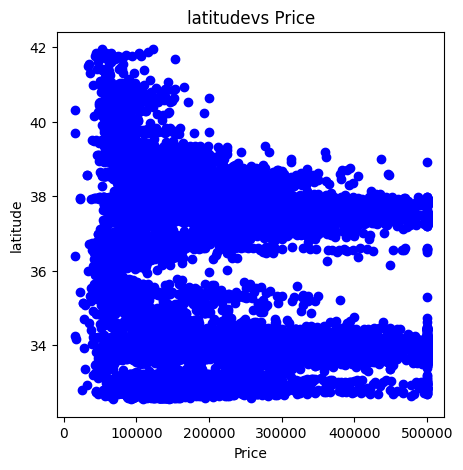

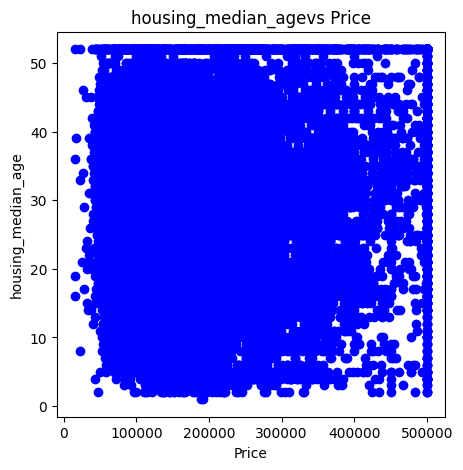

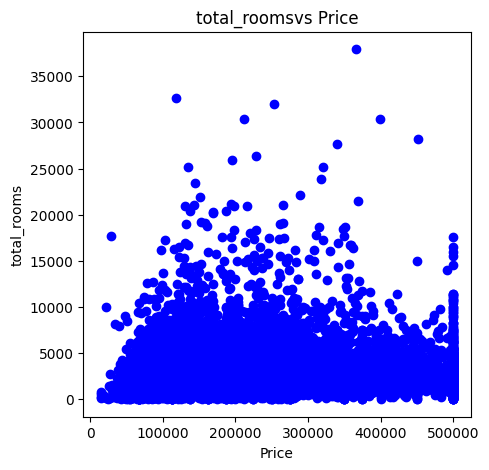

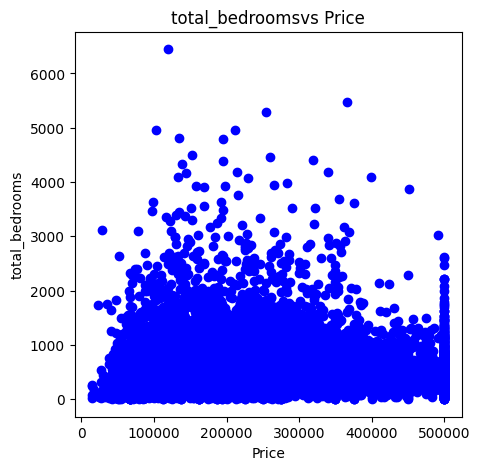

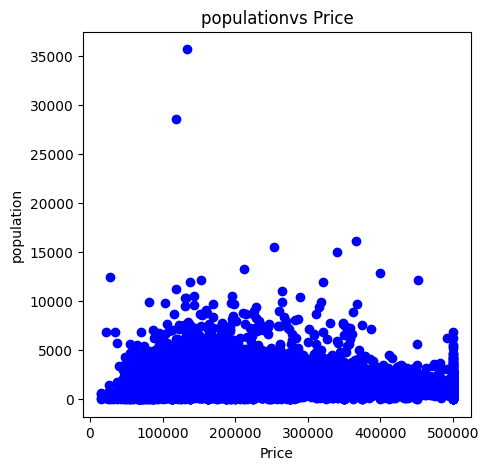

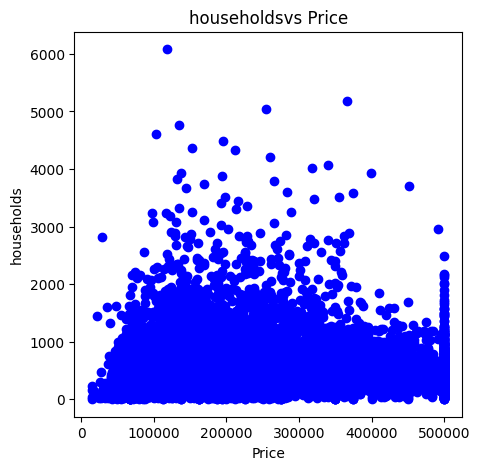

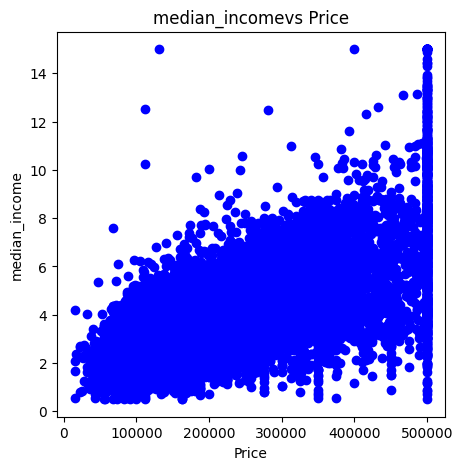

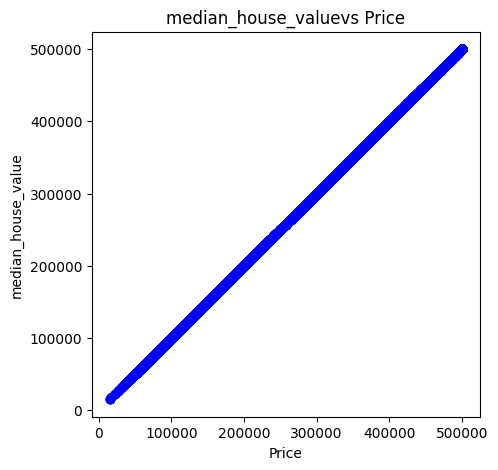

In [ ]:

for i in range(l):
  plt.figure(figsize= (5,5))
  plt.scatter(df['median_house_value'],df[features[i]],marker='o',c = 'blue')
  plt.title(features[i]+'vs Price')
  plt.xlabel('Price')
  plt.ylabel(features[i])
  plt.show()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [ ]:
data = df.to_numpy()
data.shape

(17000, 9)

In [ ]:
h = len(data)
train = data[:int(0.8*h)]
test = data[int(0.8*h):]

In [ ]:
print(f'length of Training set {len(train)}')
print(f'length of Testing set {len(test)}')

length of Training set 13600
length of Testing set 3400


In [ ]:
x_train, y_train = train[:,:-1] ,train[:,-1]
x_test, y_test   = test[:,:-1] ,test[:,-1]

print(f'Shape of x_train {x_train.shape}')
print(f'Shape of y_train {y_train.shape}')
print(f'Shape of x_test {x_test.shape}')
print(f'Shape of y_test {y_test.shape}')

Shape of x_train (13600, 8)
Shape of y_train (13600,)
Shape of x_test (3400, 8)
Shape of y_test (3400,)


In [ ]:
scalar  = StandardScaler()
scalar.fit(x_train)
x_train_scaled = scalar.transform(x_train)
x_test_scaled  = scalar.transform(x_test)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train_scaled,y_train)

LinearRegression()

In [ ]:
y_predicted = model.predict(x_test_scaled)

In [ ]:
print(f'actual vlaue : {y_test[0]}')
print(f'predicted vlaue : {y_predicted[0]}')

actual vlaue : 204100.0
predicted vlaue : 192643.94279169274


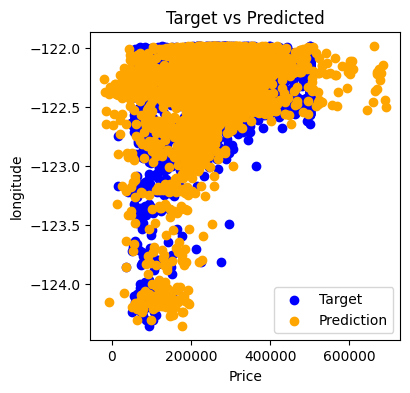

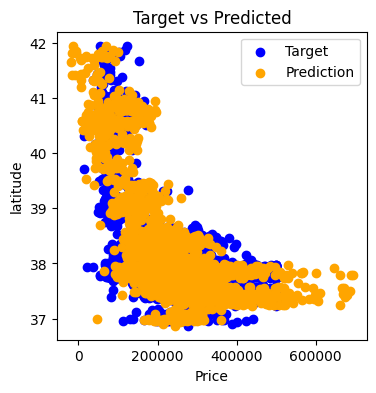

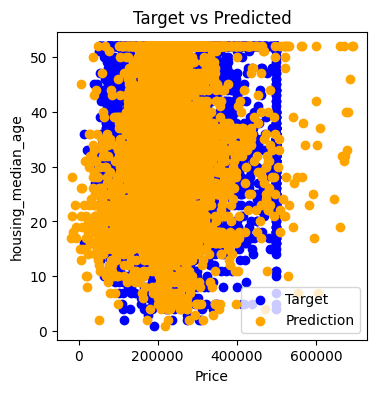

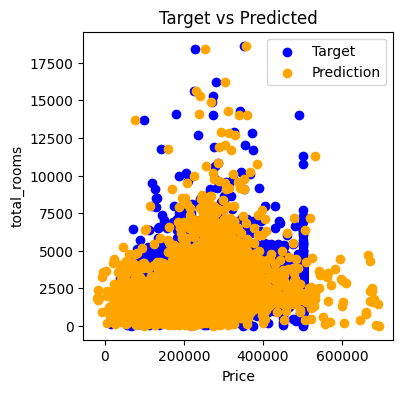

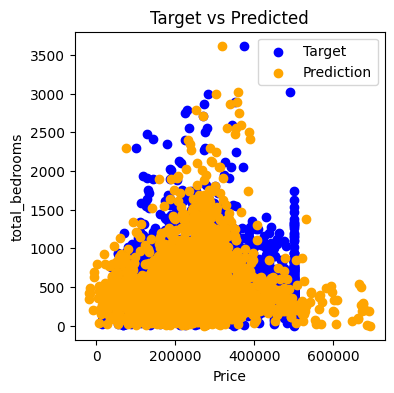

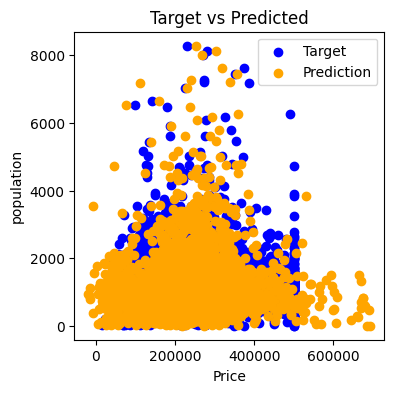

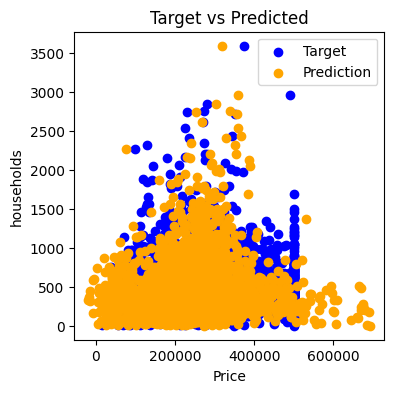

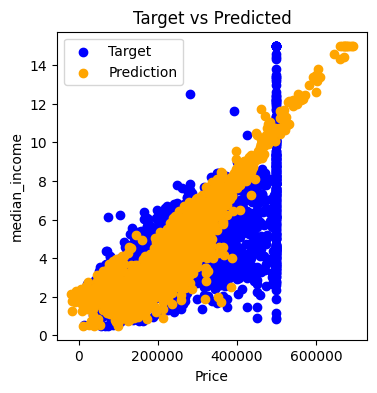

In [ ]:
for i in range(l-1):
  plt.figure(figsize= (4,4))
  plt.scatter(y_test,x_test[:,i],label='Target',marker= 'o',c= 'blue')
  plt.scatter(y_predicted,x_test[:,i],label = 'Prediction',marker= 'o',c= 'orange')
  plt.title('Target vs Predicted')
  plt.ylabel(features[i])
  plt.xlabel('Price')
  plt.legend()
  plt.show